# Notebook Examples for Chapter 1
# Images, Arrays and Matrices
There are many  Earth observation satellite-based sensors, both active and passive, currently in orbit or planned for the near future.
Laying the mathematical foundation for the image analysis procedures and algorithms forming the substance of the text,
Chapter 1 begins with a short description of typical remote sensing imagery in the  optical/infrared  and synthetic aperture radar categories, together with their representations as digital arrays.  The multispectral ASTER system and the TerraSAR-X synthetic aperture radar satellite are chosen as illustrations.  Then some basic concepts of linear algebra of vectors and matrices are introduced, namely linear dependence,  eigenvalues and eigenvectors, singular value  decomposition and finding minima and maxima using Lagrange multipliers. The latter is illustrated with the principal components analysis of a multispectral image.

In [1]:
# Requirements
from osgeo import gdal
from osgeo.gdalconst import GA_ReadOnly
import numpy as np
from IPython.display import Image

%matplotlib inline

import ee
ee.Authenticate()
ee.Initialize()

## 1.1 Multispectral satellite images

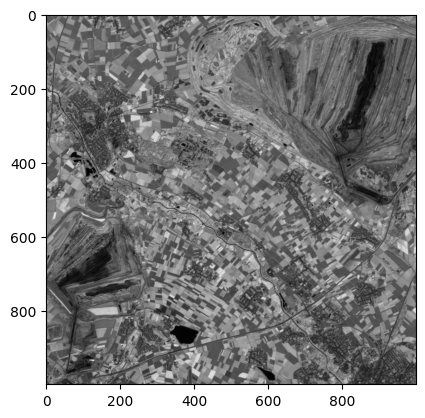

<Figure size 640x480 with 0 Axes>

In [2]:
run scripts/ex1_1 imagery/AST_20070501.tif  3 

## 1.2 Synthetic aperture radar images

In [3]:
minlon = 6.31
minlat = 50.83
maxlon = 6.58
maxlat = 50.95

rect = ee.Geometry.Rectangle([minlon,minlat,maxlon,maxlat])
collection = ee.ImageCollection('COPERNICUS/S1_GRD') \
  .filterBounds(rect) \
  .filterDate(ee.Date('2017-05-01'), ee.Date('2017-06-01')) \
  .filter(ee.Filter.eq('transmitterReceiverPolarisation', 
                                              ['VV','VH'])) \
  .filter(ee.Filter.eq('resolution_meters', 10)) \
  .filter(ee.Filter.eq('instrumentMode', 'IW')) 
    
image = ee.Image(collection.first()).clip(rect)                        
url = image.select('VV').getThumbURL({'min':-20,'max':0})
Image(url=url)

## 1.3 Linear algebra of vectors and matrices
### 1.3.1 Elementary properties
### 1.3.2 Square matrices
### 1.3.3 Singular matrices
### 1.3.4 Symmetric, positive definite matrices

In [4]:
gdal.AllRegister()
infile = 'imagery/AST_20070501.tif'                
inDataset = gdal.Open(infile,GA_ReadOnly)     
cols = inDataset.RasterXSize
rows = inDataset.RasterYSize    

#  data matrix
G = np.zeros((rows*cols,3))                                   
for b in range(3):
    band = inDataset.GetRasterBand(b+1)
    tmp = band.ReadAsArray(0,0,cols,rows).ravel()
    G[:,b] = tmp - np.mean(tmp)
    
#  covariance matrix
C = np.mat(G).T*np.mat(G)/(cols*rows-1)  
C

matrix([[ 407.13229638,  442.18038527,  -78.32374081],
        [ 442.18038527,  493.57036427, -120.64197555],
        [ -78.32374081, -120.64197555,  438.95704379]])

### 1.3.5 Linear dependence and vector spaces
### 1.3.6 Eigenvalues and eigenvectors

In [5]:
eigenvalues, eigenvectors = np.linalg.eigh(C)
print(eigenvalues)
print(eigenvectors)

[  4.77425683 399.58595201 935.2994956 ]
[[-0.73352328  0.22653637 -0.64080018]
 [ 0.67736254  0.16613156 -0.71664517]
 [ 0.05588906  0.95972995  0.27530862]]


In [6]:
U = eigenvectors
print(U.T*U)

[[ 1.00000000e+00 -5.14046042e-17 -4.62167440e-16]
 [-5.14046042e-17  1.00000000e+00 -7.49522031e-17]
 [-4.62167440e-16 -7.49522031e-17  1.00000000e+00]]


### 1.3.7 Singular value decomposition

In [7]:
b = np.mat([1,2,3])
# an almost singular matrix
A = b.T*b + np.random.rand(3,3)*0.001
# a symmetric almost singular matrix
A = A + A.T
print('determinant: %f'%np.linalg.det(A))
# singular value decomposition
U,Lambda,V = np.linalg.svd(A)
print('Lambda = %s'%str(Lambda))
print('U = %s'%str(U))
print('V = %s'%str(V))

determinant: 0.000000
Lambda = [2.80016255e+01 2.23305309e-04 3.91230324e-05]
U = [[-0.26729819  0.17163317 -0.94820553]
 [-0.53452696 -0.8451483  -0.00229633]
 [-0.80176843  0.50622762  0.31764916]]
V = [[-0.26729819 -0.53452696 -0.80176843]
 [ 0.17163317 -0.8451483   0.50622762]
 [-0.94820553 -0.00229633  0.31764916]]


### 1.3.8 Tensors

In [8]:
import tensorflow as tf
data = [[1., 2.],[3., 4.]]
tf_data = tf.constant(data)
np_array = np.array(tf_data)
tf_np = tf.constant(np_array)
print(tf_np)

2025-09-20 09:55:04.981173: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-20 09:55:04.983743: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-20 09:55:05.083649: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-20 09:55:05.450514: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-20 09:55:06.294120: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)


## 1.4 Finding minima and maxima

In [9]:
%run scripts/ex1_2 imagery/AST_20070501.tif imagery/ex1_2.tif

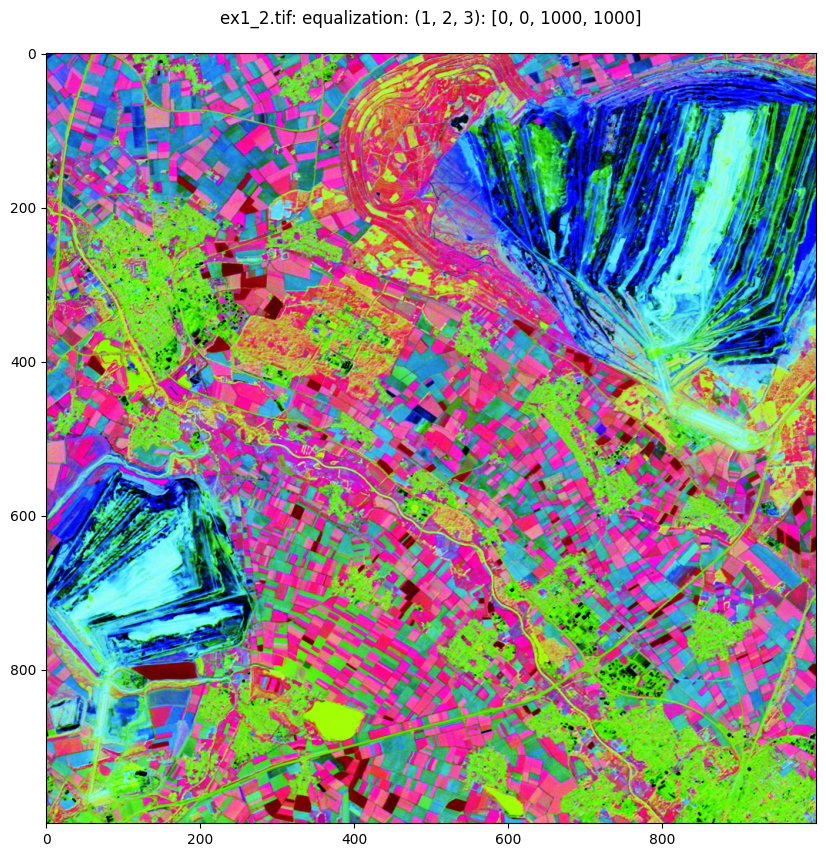

<Figure size 640x480 with 0 Axes>

In [10]:
%run scripts/dispms -f 'imagery/ex1_2.tif' -p [1,2,3] -e 4 \
#-s '~/LaTeX/new projects/CRC5/Chapter1/fig1_8.eps'